In [1]:
#Import packages
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cftime
import pandas as pd

In [2]:
#Identify path
path = '/Users/emmabenedict/Desktop/Code/'

In [3]:
#Load .nc file for E3SM.HR and E3SM.MMF
#HR
esm_hr = xr.open_dataset(path + 'E3SM.HR.ne120pg2.0001-0010.US.2x2.5.hourly.PRECC.PRECL.nc')
#MMF
esm_mmf = xr.open_dataset(path + 'E3SM.MMF.ne30pg2_CRM64x2000.0001-0010.US.2x2.5.hourly.PRECC.PRECL.nc')
#CPC
cpc_nc = xr.open_dataset(path + 'CPC.1958-1997.US.2x2.5.hourly.precip.nc')
#IMERG
imerg_nc = xr.open_dataset(path + 'IMERG.2001-2020.US.2x2.5.half_hourly.precipitationCal.nc')

In [17]:
cpc_nc

<xarray.Dataset>
Dimensions:  (lat: 21, lon: 33, time: 350640)
Coordinates:
  * lat      (lat) float32 20.0 22.0 24.0 26.0 28.0 ... 52.0 54.0 56.0 58.0 60.0
  * lon      (lon) float32 220.0 222.5 225.0 227.5 ... 292.5 295.0 297.5 300.0
  * time     (time) datetime64[ns] 1958-01-01 ... 1997-12-31T23:00:00
Data variables:
    precip   (time, lat, lon) float32 ...
Attributes:
    title:          CPC 2x2.5 Hourly US Precipitation
    Conventions:    CF-1.2
    history:        Tue Feb  9 04:56:06 2021: ncrcat 1958-1997/precip.hour.19...
    description:    Gridded hourly Precipitation
    platform:       Observations
    documentation:  https://www.esrl.noaa.gov/psd/data/gridded/data.cpc_hour....
    Source:         http://www.cpc.ncep.noaa.gov/products/precip/realtime/tmi...
    References:     https://www.psl.noaa.gov/data/gridded/data.cpc_hour.html
    dataset_title:  CPC Hourly Precipitation for the United States
    NCO:            netCDF Operators version 4.9.7 (Homepage = http://nco.sf....

In [16]:
imerg_nc

<xarray.Dataset>
Dimensions:           (lat: 21, lon: 33, nbnd: 2, time: 350640)
Coordinates:
  * lat               (lat) float64 20.0 22.0 24.0 26.0 ... 54.0 56.0 58.0 60.0
  * lon               (lon) float64 220.0 222.5 225.0 ... 295.0 297.5 300.0
  * time              (time) object 2001-01-01 00:00:00 ... 2020-12-31 23:30:00
Dimensions without coordinates: nbnd
Data variables:
    lat_bnds          (lat, nbnd) float64 ...
    lon_bnds          (lon, nbnd) float64 ...
    gw                (lat) float64 ...
    area              (lat, lon) float64 ...
    precipitationCal  (time, lat, lon) float32 ...
Attributes: (12/13)
    FileHeader:                      DOI=10.5067/GPM/IMERG/3B-HH/06;\nDOIauth...
    FileInfo:                        DataFormatVersion=6a;\nTKCodeBuildVersio...
    Grid.GridHeader:                 BinMethod=ARITHMETIC_MEAN;\nRegistration...
    Grid.fullnamepath:               /Grid
    DODS_EXTRA.Unlimited_Dimension:  Grid_time
    history:                         Tue Jul  6 17:34:43 2021: ncrcat permute...
    ...                              ...
    remap_script:                    ncremap
    remap_hostname:                  cori04
    remap_version:                   4.9.7
    nco_openmp_thread_number:        2
    map_file:                        ../maps/map_imerg_0.1x0.1_to_cpc_2x2.5_a...
    input_file:                      permute/3B-HHR.MS.MRG.3IMERG.200101.nc

In [4]:
#Load variables
#HR
lat_hr = esm_hr.lat
lon_hr = esm_hr.lon
time_hr = esm_hr.time
precc_hr = esm_hr.PRECC
precl_hr = esm_hr.PRECL
precip_hr = precc_hr + precl_hr
area_hr = esm_hr.area
#MMF
lat_mmf = esm_mmf.lat
lon_mmf = esm_mmf.lon
time_mmf = esm_mmf.time
precc_mmf = esm_mmf.PRECC
precl_mmf = esm_mmf.PRECL
precip_mmf = precc_mmf + precl_mmf
area_mmf = esm_mmf.area

In [5]:
#Load variables
#CPC
lat_cpc = cpc_nc.lat
lon_cpc = cpc_nc.lon
time_cpc = cpc_nc.time
precip_cpc = cpc_nc.precip
#MMF
lat_img = imerg_nc.lat
lon_img = imerg_nc.lon
time_img = imerg_nc.time
precip_img = imerg_nc.precipitationCal

In [6]:
#Specific locations: Athens and Seattle
hr_athens = precip_hr.sel(lon=276.64,lat=33.95,method="nearest")*1000*60*60
hr_seattle = precip_hr.sel(lon=237.67,lat=47.60,method="nearest")*1000*60*60
mmf_athens = precip_mmf.sel(lon=276.64,lat=33.95,method="nearest")*1000*60*60
mmf_seattle = precip_mmf.sel(lon=237.67,lat=47.60,method="nearest")*1000*60*60
#Obs
cpc_athens = precip_cpc.sel(lon=276.64,lat=33.95,method="nearest")*25.4
cpc_seattle = precip_cpc.sel(lon=237.67,lat=47.60,method="nearest")*25.4
img_athens = precip_img.sel(lon=276.64,lat=33.95,method="nearest")
img_seattle = precip_img.sel(lon=237.67,lat=47.60,method="nearest")

In [7]:
#Pick out one year
hr_athens_1 = hr_athens.sel(time = slice("0005-01-01 00:00:00","0005-12-31 23:00:00"))#.mean(dim="time")
hr_seattle_1 = hr_seattle.sel(time = slice("0005-01-01 00:00:00","0005-12-31 23:00:00"))#.mean(dim="time")
mmf_athens_1 = mmf_athens.sel(time = slice("0005-01-01 00:00:00","0005-12-31 23:00:00"))#.mean(dim="time")
mmf_seattle_1 = mmf_seattle.sel(time = slice("0005-01-01 00:00:00","0005-12-31 23:00:00"))#.mean(dim="time")
cpc_athens_1 = cpc_athens.sel(time = slice("1977-01-01T00:00:00.000000000", "1977-12-31T23:00:00.000000000"))#.mean(dim="time")
cpc_seattle_1 = cpc_seattle.sel(time = slice("1977-01-01T00:00:00.000000000", "1977-12-31T23:00:00.000000000"))#.mean(dim="time")
img_athens_1 = img_athens.sel(time = slice("2010-01-01 00:00:00","2010-12-31 23:30:00")).resample(time = '1H').mean()#.mean(dim="time")
img_seattle_1 = img_seattle.sel(time = slice("2010-01-01 00:00:00","2010-12-31 23:30:00")).resample(time = '1H').mean()#.mean(dim="time")

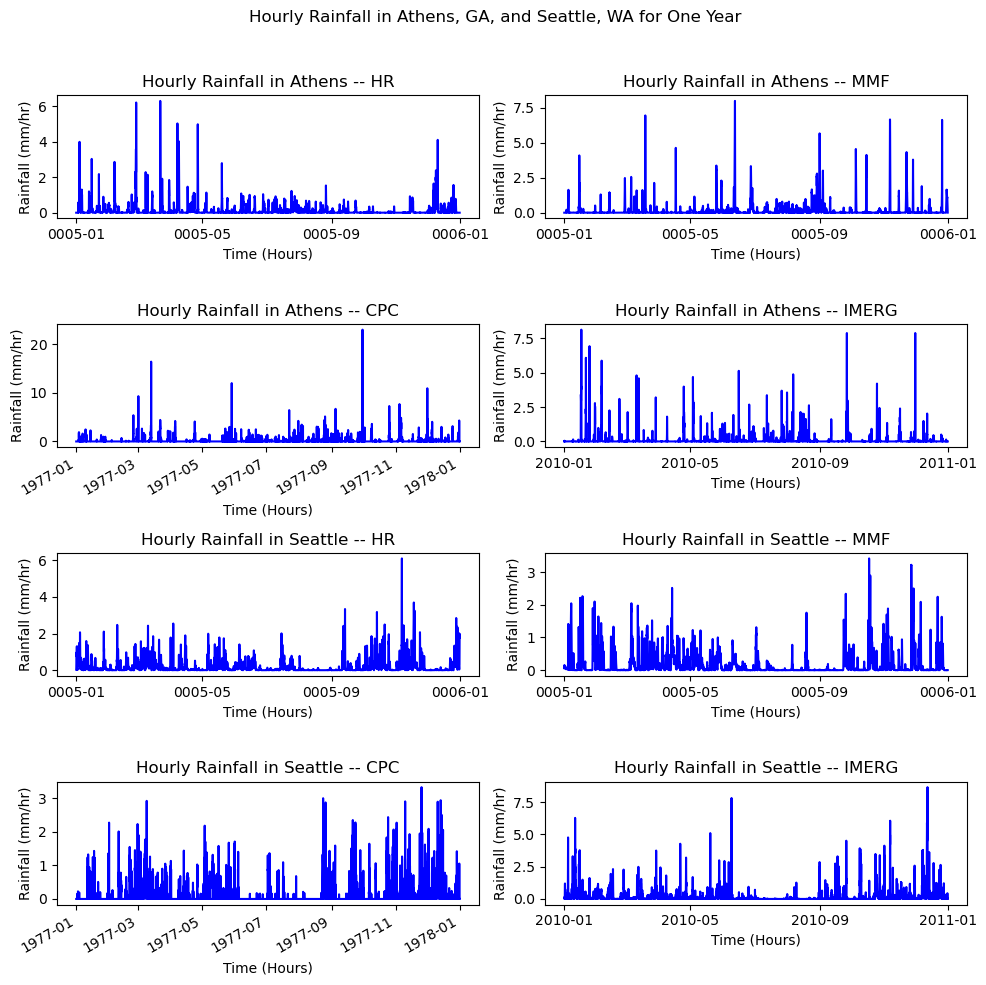

In [8]:
plt.figure(figsize = (10,10))
plt.subplot(4,2,1)
hr_athens_1.plot(color = "blue")
#plt.plot(hr_athens_1)
# plt.axhline(y=hr_athens_99, color='red', linestyle='--', label='99th Percentile')
# plt.axhline(y=avg_hr_athens, color='cyan', linestyle='--', label='Average')
plt.xlabel("Time (Hours)")
plt.ylabel("Rainfall (mm/hr)")
#plt.legend()
plt.title("Hourly Rainfall in Athens -- HR")

plt.subplot(4,2,2)
mmf_athens_1.plot(color = "blue")
# plt.axhline(y=mmf_athens_99, color='red', linestyle='--', label='99th Percentile')
# plt.axhline(y=avg_mmf_athens, color='cyan', linestyle='--', label='Average')
plt.xlabel("Time (Hours)")
plt.ylabel("Rainfall (mm/hr)")
#plt.legend()
plt.title("Hourly Rainfall in Athens -- MMF")

plt.subplot(4,2,3)
cpc_athens_1.plot(color = "blue")
# plt.axhline(y=cpc_athens_99, color='red', linestyle='--', label='99th Percentile')
# plt.axhline(y=avg_cpc_athens, color='cyan', linestyle='--', label='Average')
plt.xlabel("Time (Hours)")
plt.ylabel("Rainfall (mm/hr)")
#plt.legend()
plt.title("Hourly Rainfall in Athens -- CPC")

plt.subplot(4,2,4)
img_athens_1.plot(color = "blue")
# plt.axhline(y=img_athens_99, color='red', linestyle='--', label='99th Percentile')
# plt.axhline(y=avg_img_athens, color='cyan', linestyle='--', label='Average')
plt.xlabel("Time (Hours)")
plt.ylabel("Rainfall (mm/hr)")
#plt.legend()
plt.title("Hourly Rainfall in Athens -- IMERG")

plt.subplot(4,2,5)
hr_seattle_1.plot(color = "blue")
# plt.axhline(y=hr_seattle_99, color='red', linestyle='--', label='99th Percentile')
# plt.axhline(y=avg_hr_seattle, color='cyan', linestyle='--', label='Average')
plt.xlabel("Time (Hours)")
plt.ylabel("Rainfall (mm/hr)")
#plt.legend()
plt.title("Hourly Rainfall in Seattle -- HR")

plt.subplot(4,2,6)
mmf_seattle_1.plot(color = "blue")
# plt.axhline(y=mmf_seattle_99, color='red', linestyle='--', label='99th Percentile')
# plt.axhline(y=avg_mmf_seattle, color='cyan', linestyle='--', label='Average')
plt.xlabel("Time (Hours)")
plt.ylabel("Rainfall (mm/hr)")
#plt.legend()
plt.title("Hourly Rainfall in Seattle -- MMF")

plt.subplot(4,2,7)
cpc_seattle_1.plot(color = "blue")
# plt.axhline(y=cpc_seattle_99, color='red', linestyle='--', label='99th Percentile')
# plt.axhline(y=avg_cpc_seattle, color='cyan', linestyle='--', label='Average')
plt.xlabel("Time (Hours)")
plt.ylabel("Rainfall (mm/hr)")
#plt.legend()
plt.title("Hourly Rainfall in Seattle -- CPC")

plt.subplot(4,2,8)
img_seattle_1.plot(color = "blue")
# plt.axhline(y=img_seattle_99, color='red', linestyle='--', label='99th Percentile')
# plt.axhline(y=avg_img_seattle, color='cyan', linestyle='--', label='Average')
plt.xlabel("Time (Hours)")
plt.ylabel("Rainfall (mm/hr)")
#plt.legend()
plt.title("Hourly Rainfall in Seattle -- IMERG")

plt.suptitle('Hourly Rainfall in Athens, GA, and Seattle, WA for One Year', fontsize=12)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [9]:
#Create function for rolling mean
def rolling_mean(data, window):
    return np.convolve(data, np.ones(window), 'valid') / window

In [10]:
hr_athens_rm = rolling_mean(hr_athens_1,24)
hr_seattle_rm = rolling_mean(hr_seattle_1,24)
mmf_athens_rm = rolling_mean(mmf_athens_1,24)
mmf_seattle_rm = rolling_mean(mmf_seattle_1,24)
cpc_athens_rm = rolling_mean(cpc_athens_1,24)
cpc_seattle_rm = rolling_mean(cpc_seattle_1,24)
img_athens_rm = rolling_mean(img_athens_1,24)
img_seattle_rm = rolling_mean(img_seattle_1,24)

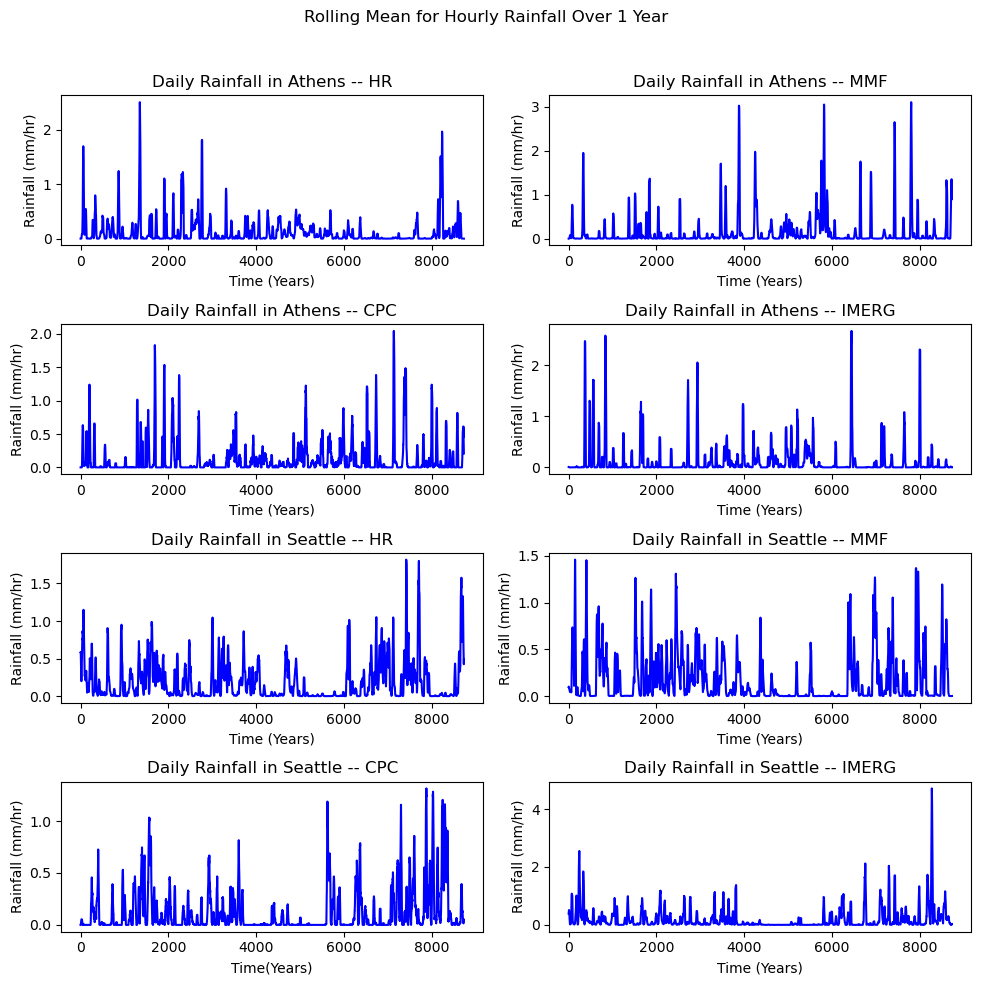

In [11]:
plt.figure(figsize = (10,10))
plt.subplot(4,2,1)
plt.plot(hr_athens_rm, color = 'blue')
# plt.axhline(y=hr_athens_99, color='red', linestyle='--', label='99th Percentile')
# plt.axhline(y=avg_hr_athens, color='cyan', linestyle='--', label='Average')
plt.xlabel("Time (Years)")
plt.ylabel("Rainfall (mm/hr)")
#plt.legend()
plt.title("Daily Rainfall in Athens -- HR")

plt.subplot(4,2,2)
plt.plot(mmf_athens_rm, color = 'blue')
# plt.axhline(y=mmf_athens_99, color='red', linestyle='--', label='99th Percentile')
# plt.axhline(y=avg_mmf_athens, color='cyan', linestyle='--', label='Average')
plt.xlabel("Time (Years)")
plt.ylabel("Rainfall (mm/hr)")
#plt.legend()
plt.title("Daily Rainfall in Athens -- MMF")

plt.subplot(4,2,3)
plt.plot(cpc_athens_rm, color = 'blue')
# plt.axhline(y=cpc_athens_99, color='red', linestyle='--', label='99th Percentile')
# plt.axhline(y=avg_cpc_athens, color='cyan', linestyle='--', label='Average')
plt.xlabel("Time (Years)")
plt.ylabel("Rainfall (mm/hr)")
#plt.legend()
plt.title("Daily Rainfall in Athens -- CPC")

plt.subplot(4,2,4)
plt.plot(img_athens_rm, color = 'blue')
# plt.axhline(y=img_athens_99, color='red', linestyle='--', label='99th Percentile')
# plt.axhline(y=avg_img_athens, color='cyan', linestyle='--', label='Average')
plt.xlabel("Time (Years)")
plt.ylabel("Rainfall (mm/hr)")
#plt.legend()
plt.title("Daily Rainfall in Athens -- IMERG")

plt.subplot(4,2,5)
plt.plot(hr_seattle_rm, color = 'blue')
# plt.axhline(y=hr_seattle_99, color='red', linestyle='--', label='99th Percentile')
# plt.axhline(y=avg_hr_seattle, color='cyan', linestyle='--', label='Average')
plt.xlabel("Time (Years)")
plt.ylabel("Rainfall (mm/hr)")
#plt.legend()
plt.title("Daily Rainfall in Seattle -- HR")

plt.subplot(4,2,6)
plt.plot(mmf_seattle_rm, color = 'blue')
# plt.axhline(y=mmf_seattle_99, color='red', linestyle='--', label='99th Percentile')
# plt.axhline(y=avg_mmf_seattle, color='cyan', linestyle='--', label='Average')
plt.xlabel("Time (Years)")
plt.ylabel("Rainfall (mm/hr)")
#plt.legend()
plt.title("Daily Rainfall in Seattle -- MMF")

plt.subplot(4,2,7)
plt.plot(cpc_seattle_rm, color = 'blue')
# plt.axhline(y=cpc_seattle_99, color='red', linestyle='--', label='99th Percentile')
# plt.axhline(y=avg_cpc_seattle, color='cyan', linestyle='--', label='Average')
plt.xlabel("Time(Years)")
plt.ylabel("Rainfall (mm/hr)")
#plt.legend()
plt.title("Daily Rainfall in Seattle -- CPC")

plt.subplot(4,2,8)
plt.plot(img_seattle_rm, color = 'blue')
# plt.axhline(y=img_seattle_99, color='red', linestyle='--', label='99th Percentile')
# plt.axhline(y=avg_img_seattle, color='cyan', linestyle='--', label='Average')
plt.xlabel("Time (Years)")
plt.ylabel("Rainfall (mm/hr)")
#plt.legend()
plt.title("Daily Rainfall in Seattle -- IMERG")

plt.suptitle('Rolling Mean for Hourly Rainfall Over 1 Year', fontsize=12)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


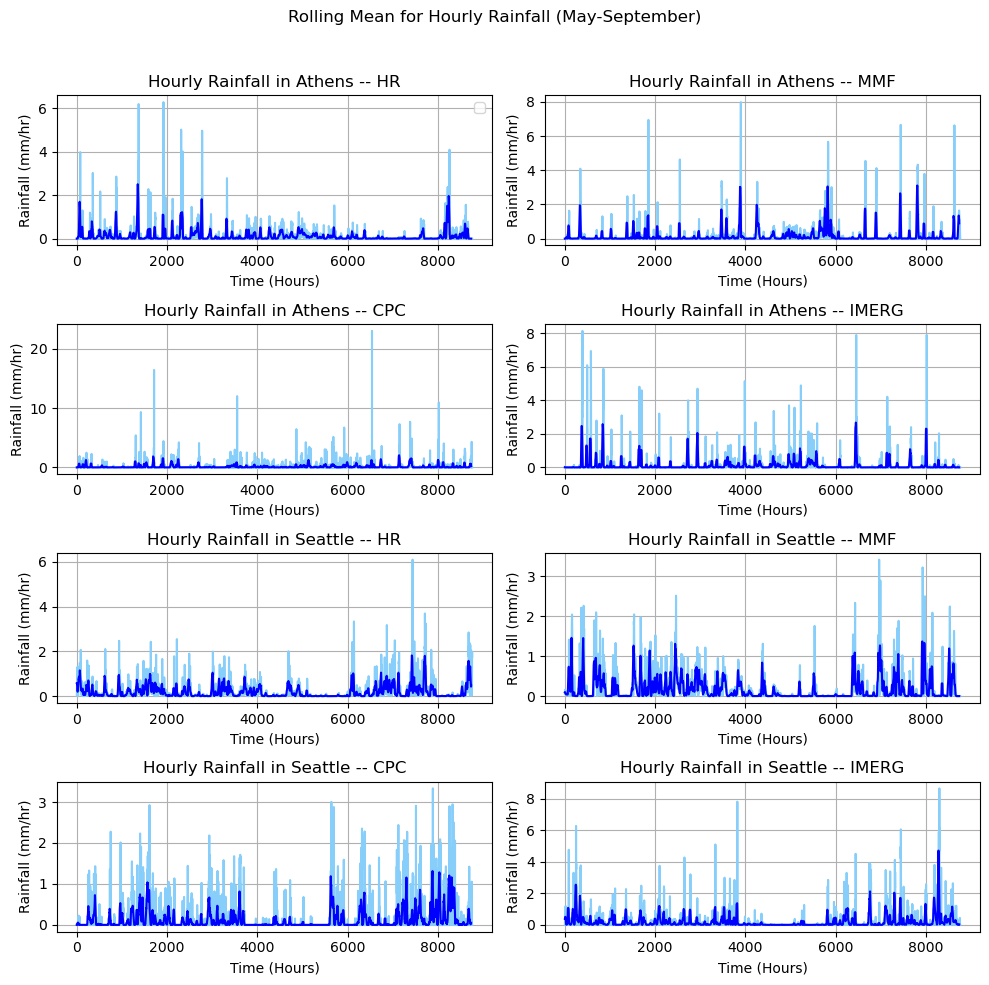

In [18]:
plt.figure(figsize = (10,10))
plt.subplot(4,2,1)
plt.plot(hr_athens_1, color = "lightskyblue")
plt.plot(hr_athens_rm, color = 'blue')
# plt.axhline(y=hr_athens_99, color='red', linestyle='--', label='99th Percentile')
# plt.axhline(y=avg_hr_athens, color='cyan', linestyle='--', label='Average')
plt.xlabel("Time (Hours)")
plt.ylabel("Rainfall (mm/hr)")
plt.grid()
plt.legend()
plt.title("Hourly Rainfall in Athens -- HR")

plt.subplot(4,2,2)
plt.plot(mmf_athens_1, color = "lightskyblue")
plt.plot(mmf_athens_rm, color = 'blue')
# plt.axhline(y=mmf_athens_99, color='red', linestyle='--', label='99th Percentile')
# plt.axhline(y=avg_mmf_athens, color='cyan', linestyle='--', label='Average')
plt.xlabel("Time (Hours)")
plt.ylabel("Rainfall (mm/hr)")
plt.grid()
#plt.legend()
plt.title("Hourly Rainfall in Athens -- MMF")

plt.subplot(4,2,3)
plt.plot(cpc_athens_1, color = "lightskyblue")
plt.plot(cpc_athens_rm, color = 'blue')
# plt.axhline(y=cpc_athens_99, color='red', linestyle='--', label='99th Percentile')
# plt.axhline(y=avg_cpc_athens, color='cyan', linestyle='--', label='Average')
plt.xlabel("Time (Hours)")
plt.ylabel("Rainfall (mm/hr)")
plt.grid()
#plt.legend()
plt.title("Hourly Rainfall in Athens -- CPC")

plt.subplot(4,2,4)
plt.plot(img_athens_1, color = "lightskyblue")
plt.plot(img_athens_rm, color = 'blue')
# plt.axhline(y=img_athens_99, color='red', linestyle='--', label='99th Percentile')
# plt.axhline(y=avg_img_athens, color='cyan', linestyle='--', label='Average')
plt.xlabel("Time (Hours)")
plt.ylabel("Rainfall (mm/hr)")
plt.grid()
#plt.legend()
plt.title("Hourly Rainfall in Athens -- IMERG")

plt.subplot(4,2,5)
plt.plot(hr_seattle_1, color = "lightskyblue")
plt.plot(hr_seattle_rm, color = 'blue')
# plt.axhline(y=hr_seattle_99, color='red', linestyle='--', label='99th Percentile')
# plt.axhline(y=avg_hr_seattle, color='cyan', linestyle='--', label='Average')
plt.xlabel("Time (Hours)")
plt.ylabel("Rainfall (mm/hr)")
plt.grid()
#plt.legend()
plt.title("Hourly Rainfall in Seattle -- HR")

plt.subplot(4,2,6)
plt.plot(mmf_seattle_1, color = "lightskyblue")
plt.plot(mmf_seattle_rm, color = 'blue')
# plt.axhline(y=mmf_seattle_99, color='red', linestyle='--', label='99th Percentile')
# plt.axhline(y=avg_mmf_seattle, color='cyan', linestyle='--', label='Average')
plt.xlabel("Time (Hours)")
plt.ylabel("Rainfall (mm/hr)")
plt.grid()
#plt.legend()
plt.title("Hourly Rainfall in Seattle -- MMF")

plt.subplot(4,2,7)
plt.plot(cpc_seattle_1, color = "lightskyblue")
plt.plot(cpc_seattle_rm, color = 'blue')
# plt.axhline(y=cpc_seattle_99, color='red', linestyle='--', label='99th Percentile')
# plt.axhline(y=avg_cpc_seattle, color='cyan', linestyle='--', label='Average')
plt.xlabel("Time (Hours)")
plt.ylabel("Rainfall (mm/hr)")
plt.grid()
#plt.legend()
plt.title("Hourly Rainfall in Seattle -- CPC")

plt.subplot(4,2,8)
plt.plot(img_seattle_1, color = "lightskyblue")
plt.plot(img_seattle_rm, color = 'blue')
# plt.axhline(y=img_seattle_99, color='red', linestyle='--', label='99th Percentile')
# plt.axhline(y=avg_img_seattle, color='cyan', linestyle='--', label='Average')
plt.xlabel("Time (Hours)")
plt.ylabel("Rainfall (mm/hr)")
plt.grid()
#plt.legend()
plt.title("Hourly Rainfall in Seattle -- IMERG")

plt.suptitle('Rolling Mean for Hourly Rainfall (May-September)', fontsize=12)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

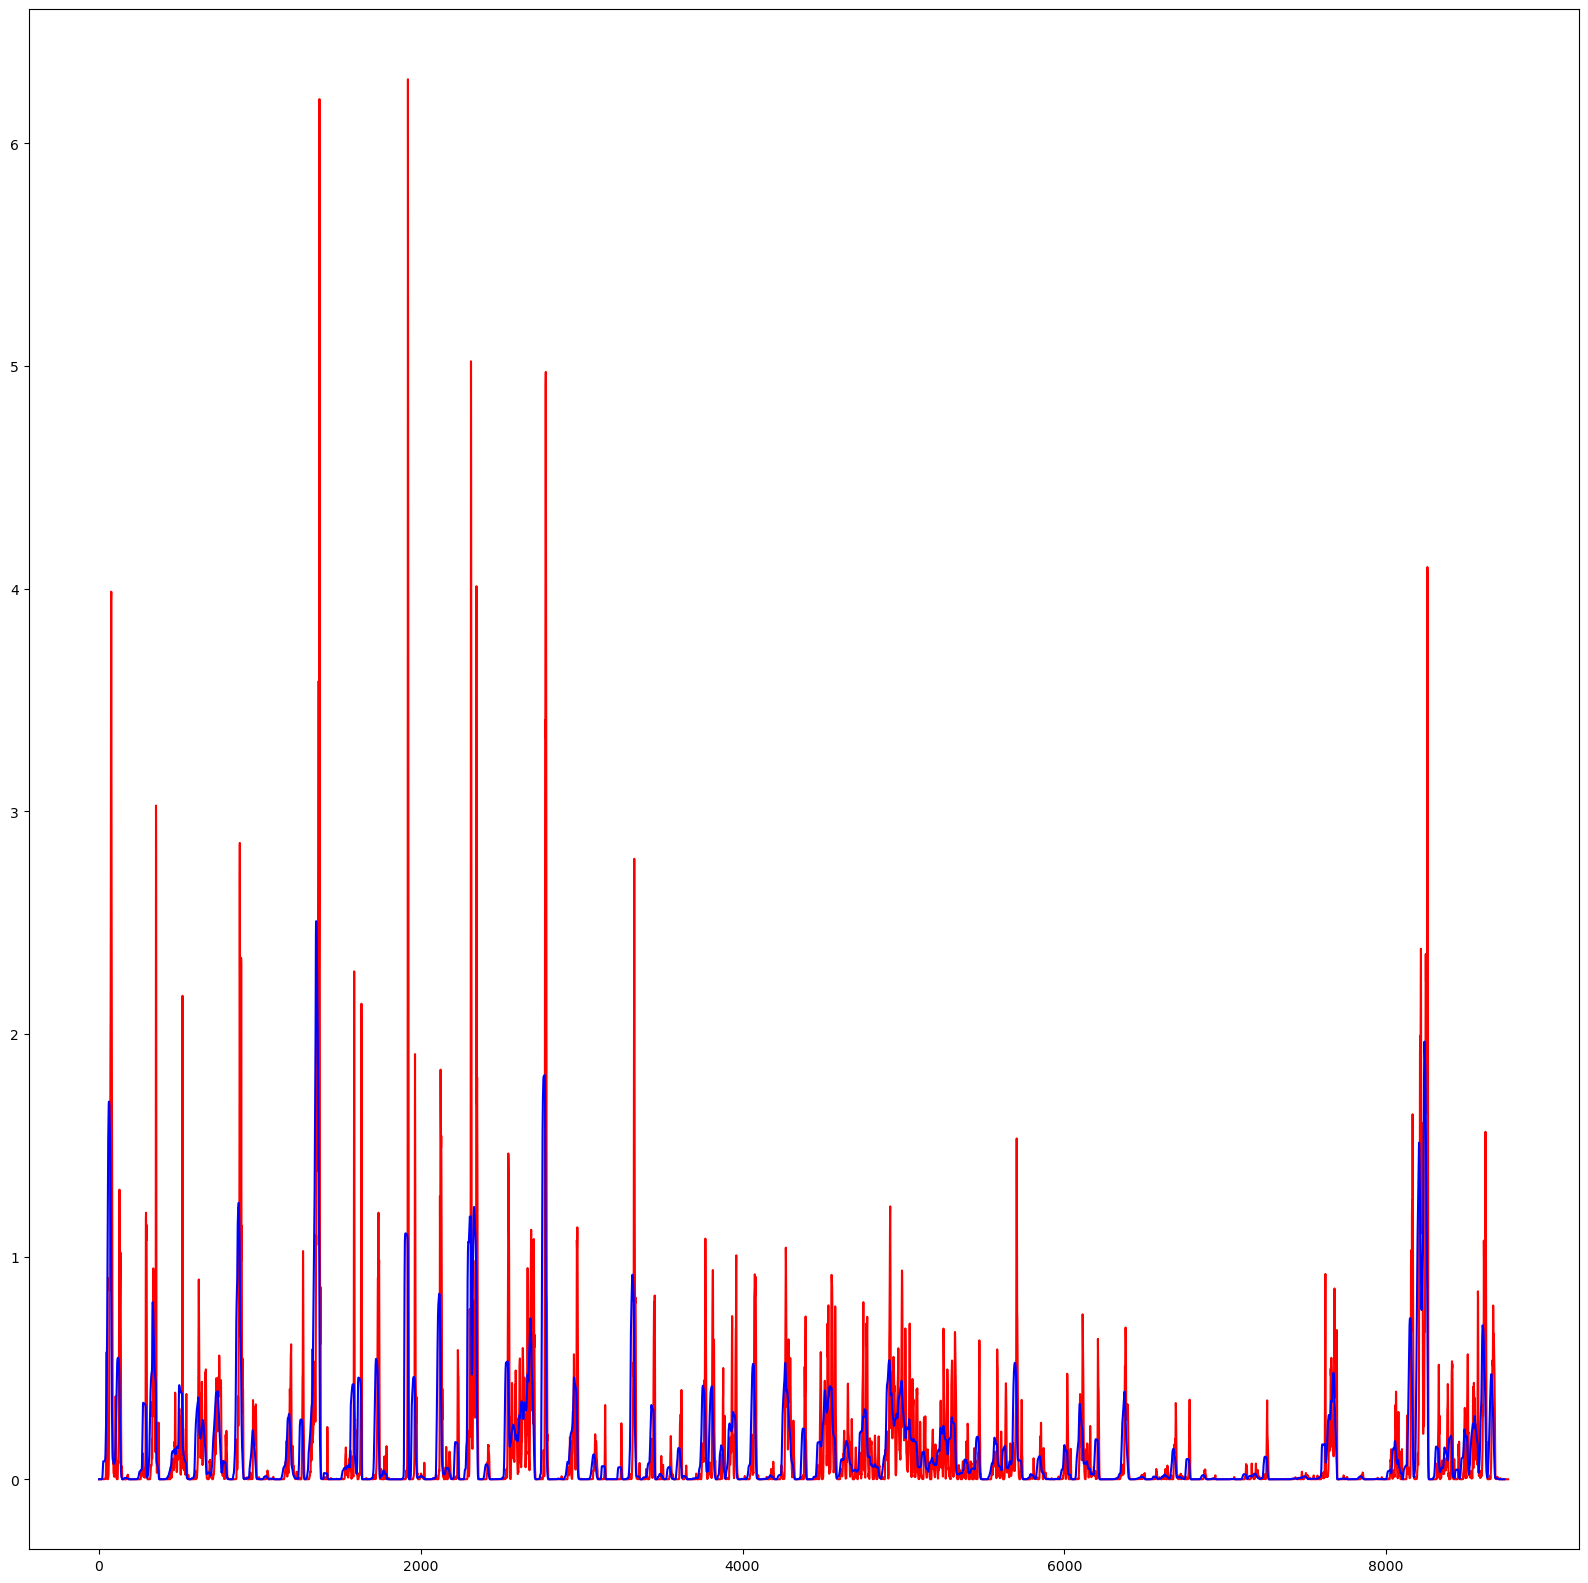

In [13]:
plt.figure(figsize = (20,20))
plt.plot(hr_athens_1, color = 'red')
plt.plot(hr_athens_rm, color = 'blue')

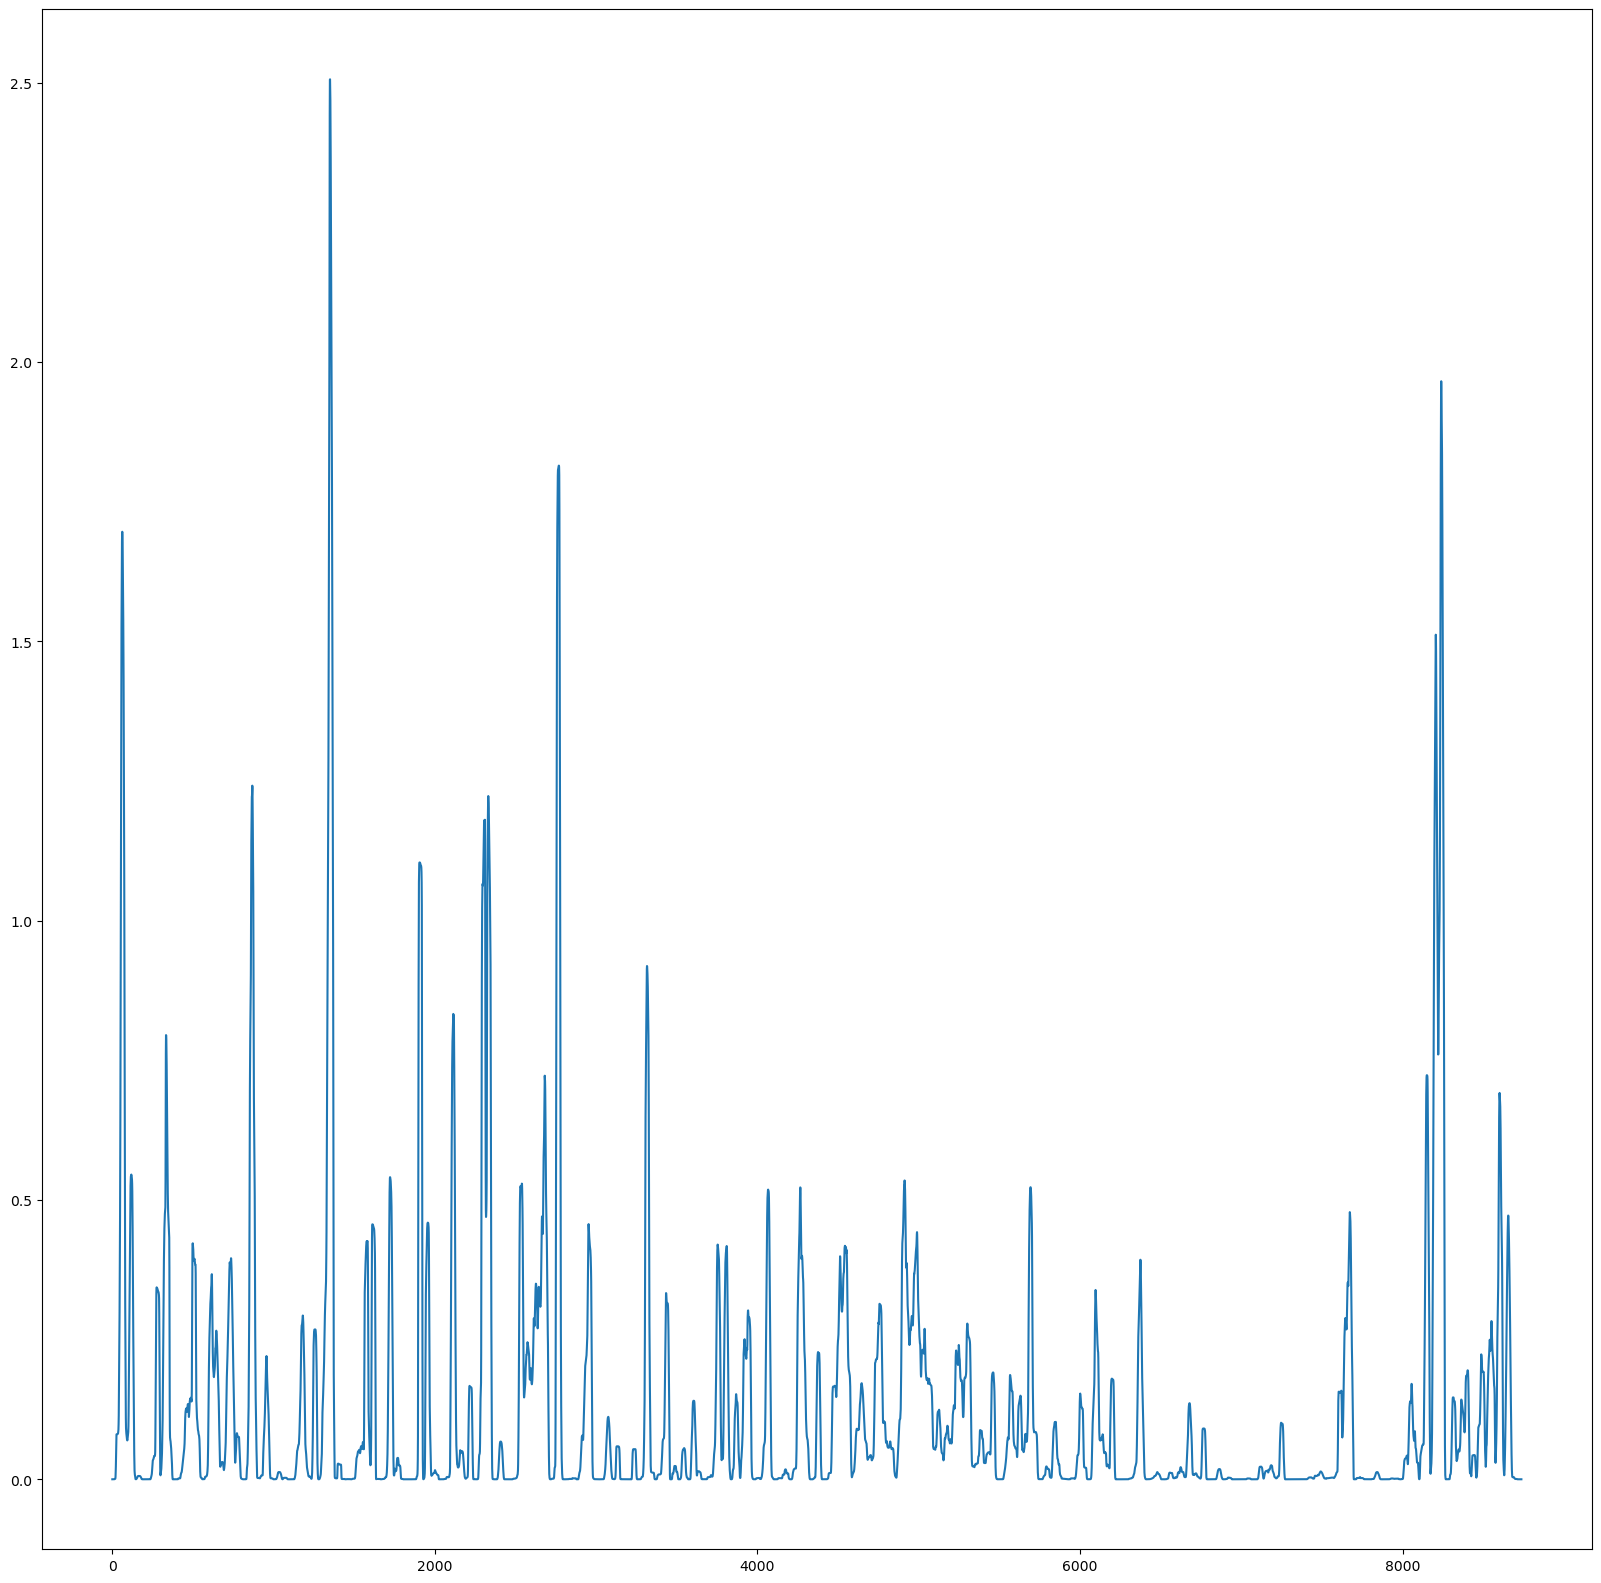

In [14]:
plt.figure(figsize = (20,20))
plt.plot(hr_athens_rm)

In [15]:
hr_athens_array = np.array(hr_athens_1)
mmf_athens_array = np.array(mmf_athens_1)
hr_seattle_array = np.array(hr_seattle_1)
mmf_seattle_array = np.array(mmf_seattle_1)

count = 0
 
for i in hr_athens_array:
    if i >= 1:
        #print(i)
        count = count + 1
    # elif i <0.5: 
    #     print(i)
print(f'Number of times in Athens (HR) it exceeds 1 mm/hr: {count}')

for i in mmf_athens_array:
    if i >= 1:
        #print(i)
        count = count + 1
    # elif i <0.5: 
    #     print(i)
print(f'Number of times in Athens (MMF) it exceeds 1 mm/hr: {count}')

for i in hr_seattle_array:
    if i >= 1:
        #print(i)
        count = count + 1
    # elif i <0.5: 
    #     print(i)
print(f'Number of times in Seattle (HR) it exceeds 1 mm/hr: {count}')

for i in mmf_seattle_array:
    if i >= 1:
        #print(i)
        count = count + 1
    # elif i <0.5: 
    #     print(i)
print(f'Number of times in Seattle (MMF) it exceeds 1 mm/hr: {count}')

Number of times in Athens (HR) it exceeds 1 mm/hr: 214
Number of times in Athens (MMF) it exceeds 1 mm/hr: 585
Number of times in Seattle (HR) it exceeds 1 mm/hr: 949
Number of times in Seattle (MMF) it exceeds 1 mm/hr: 1309
